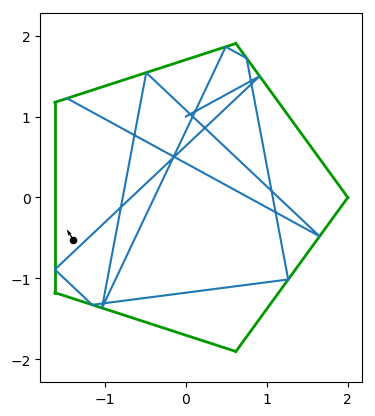

[-1.388, -0.528327][-0.52892, 0.848672][0.0, 0.0]

(PyObject <matplotlib.collections.PathCollection object at 0x13d5ba940>, PyObject <matplotlib.quiver.Quiver object at 0x13d5bae48>)

In [1]:
using DynamicalBilliards
bd = Obstacle{Float64}[]
polygon_size = 5
polygon_vertex = (r) -> [ [r*cos(2π*i/polygon_size), r*sin(2π*i/polygon_size)] for i in 1:polygon_size]
polygonver = polygon_vertex(2.0)

for i in eachindex(polygonver)
  starting = polygonver[i]
  ending = polygonver[mod1(i+1, length(polygonver))]
  w = ending - starting
  normal = [-w[2], w[1]]
  wall = InfiniteWall(starting, ending, normal, "wall $i")
  push!(bd, wall)
end

# summary(bd)
# d = Disk([0,0], 0.8)
# push!(bd, d)
# # Make the structure required:
billiard = Billiard(bd)

using PyPlot
plot(billiard)
ω = 0.8
p = randominside(billiard, ω)
normal_particle = Particle(0, 1, 0.5)
print(p.pos, p.vel, p.current_cell)
xt, yt, vxt, vyt, t = timeseries!(normal_particle, billiard, floor(10))
plot(xt, yt)
plot(p)